<a href="https://colab.research.google.com/github/Ahmdridwan28/Denoising-an-Image-using-Mean-and-Median1/blob/main/Denosing%2Cmean_median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import cv2
import numpy as np
from skimage import img_as_ubyte
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [18]:
image = cv2.imread('/content/drive/MyDrive/Foto/Oyen_Cat.jpg', 0)
image = image/image.max()

In [22]:
# Salt and Pepper Noise
x,y = image.shape
g = np.zeros((x,y), dtype=np.float32)
pepper = 0.1
salt = 0.95
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g[i][j] = 0
        elif rdn > salt:
            g[i][j] = 1
        else:
            g[i][j] = image[i][j]

img_noise = g

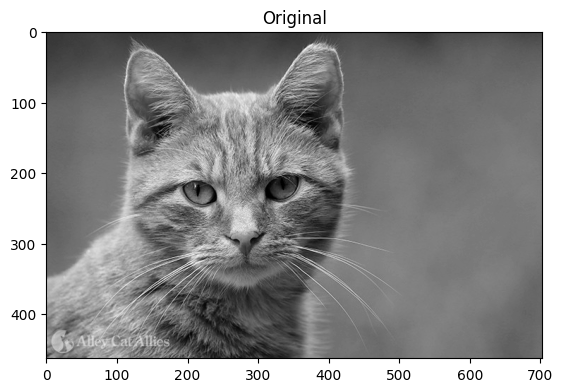

In [24]:
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.show()

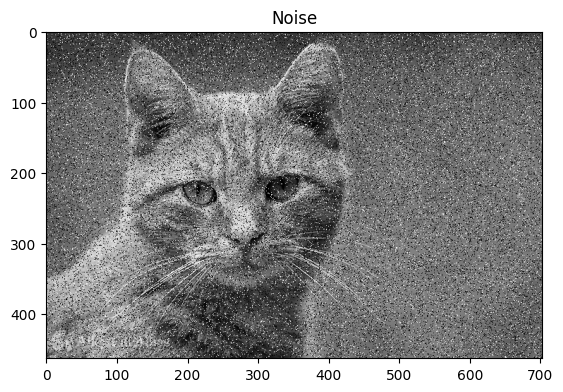

In [25]:
plt.title('Noise')
plt.imshow(img_noise, cmap='gray')
plt.show()

In [27]:
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(img_noise, (m,n))

# median filter
img_noise_median = np.clip(img_noise, -1, 1)
img_noise_median = img_as_ubyte(img_noise_median)
denoise_median = cv2.medianBlur(img_noise_median, 5)

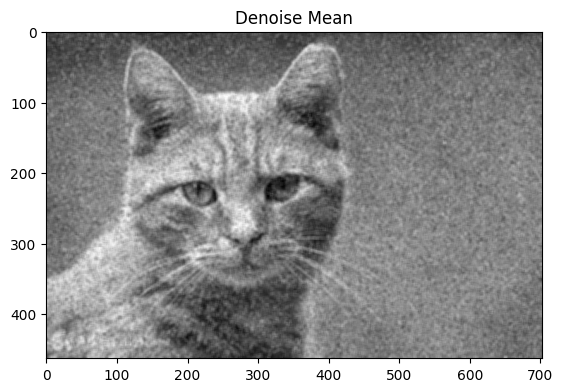

In [28]:
#Denoise Mean
plt.title('Denoise Mean')
plt.imshow(denoise_mean, cmap='gray')
plt.show()

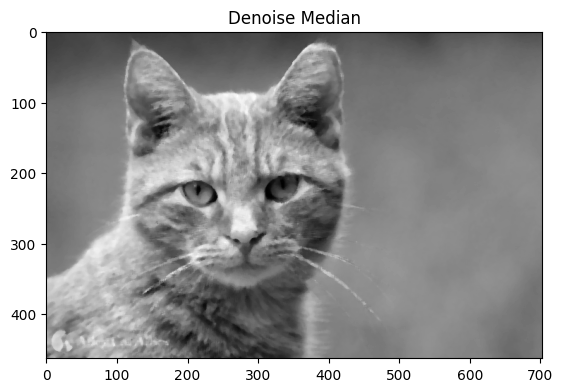

In [29]:
#Denoise Median
plt.title('Denoise Median')
plt.imshow(denoise_median, cmap='gray')
plt.show()

In [30]:
#save data gambar
cv2.imwrite('Denoise mean.jpg', img_as_ubyte(denoise_mean))
cv2.imwrite('Denoise median.jpg', img_as_ubyte(denoise_median))

True